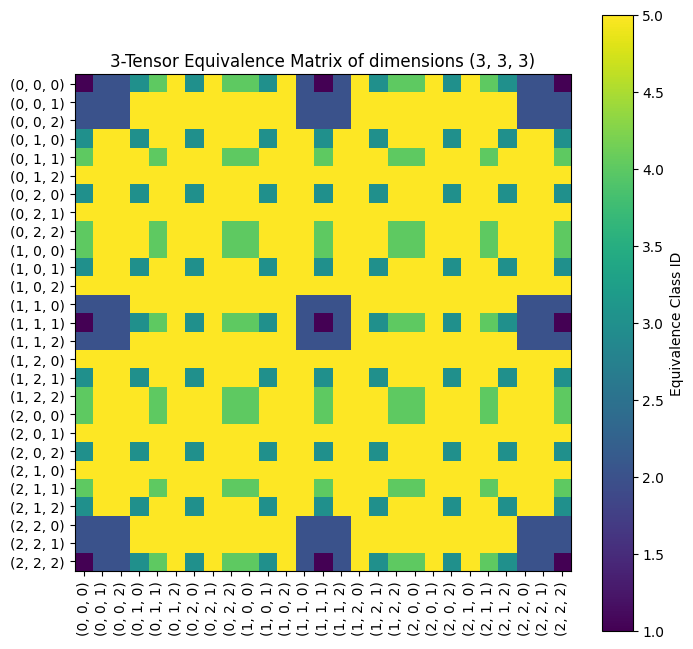

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sympy.utilities.iterables import multiset_partitions

def generate_equivalence_classes(dimensions):
    """
    Generates equivalence classes for a k-tensor with given dimensions.
    The equivalence classes are based on both rows and columns satisfying the same partition constraints.
    
    Parameters:
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    
    Returns:
    - List of equivalence classes, where each equivalence class is a set of (row, col) pairs.
    """
    k = len(dimensions)  # Number of dimensions
    indices = list(range(k))
    
    # Generate all partitions of the indices using sympy's multiset_partitions
    partitions = list(multiset_partitions(indices))
    
    # Generate equivalence classes
    equivalence_classes = [set() for _ in range(len(partitions))]
    
    # All possible combinations of tensor indices (for rows and columns)
    all_indices = list(product(*[range(dim) for dim in dimensions]))
    
    for row in all_indices:
        for col in all_indices:
            for class_id, partition in enumerate(partitions):
                is_valid = True
                for part in partition:
                    # Check consistency in the row and column
                    row_vals = [row[i] for i in part]
                    col_vals = [col[i] for i in part]
                    if len(set(row_vals)) > 1 or len(set(col_vals)) > 1:
                        is_valid = False
                        break
                if is_valid:
                    equivalence_classes[class_id].add((row, col))
                    break  # Stop once the pair is assigned to a class
    
    # Remove overlaps between classes
    for i in range(len(equivalence_classes) - 1, 0, -1):
        for j in range(i):
            equivalence_classes[i] -= equivalence_classes[j]
    
    return equivalence_classes


def equivalence_classes_to_matrix(equivalence_classes, dimensions):
    """
    Converts equivalence classes to a matrix representation for visualization.
    
    Parameters:
    - equivalence_classes: List of sets of equivalent tensor entry pairs.
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    
    Returns:
    - Matrix representation of equivalence classes.
    """
    total_size = np.prod(dimensions)
    flat_matrix = np.zeros((total_size, total_size), dtype=int)
    
    # Generate a mapping of tensor index to flattened index
    indices = list(product(*[range(dim) for dim in dimensions]))
    index_map = {index: i for i, index in enumerate(indices)}
    
    # Assign unique identifiers to each equivalence class
    for class_id, eq_class in enumerate(equivalence_classes, start=1):
        for (row, col) in eq_class:
            flat_matrix[index_map[row], index_map[col]] = class_id
    
    return flat_matrix


def plot_equiv_matrix(equiv_mat, dimensions):
    """
    Plots the equivalence matrix of a flattened tensor.
    
    Parameters:
    - equiv_mat: Matrix representation of equivalence classes.
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    """
    total_size = np.prod(dimensions)
    
    # Generate all possible index combinations for the n-dimensional space
    indices = list(product(*[range(dim) for dim in dimensions]))
    
    # Create labels for the ticks with the corresponding coordinates
    tick_labels = [str(index) for index in indices]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(equiv_mat, cmap='viridis', interpolation='nearest')
    
    # Set tick positions and labels
    plt.xticks(ticks=np.arange(total_size), labels=tick_labels, rotation=90)
    plt.yticks(ticks=np.arange(total_size), labels=tick_labels)
    
    tensor_dim = len(dimensions)
    plt.title(f"{tensor_dim}-Tensor Equivalence Matrix of dimensions {dimensions}")
    plt.colorbar(label="Equivalence Class ID")
    plt.show()


# Example Usage
dimensions = (3, 3, 3)  # A 3x3x3 tensor
equivalence_classes = generate_equivalence_classes(dimensions)
equiv_matrix = equivalence_classes_to_matrix(equivalence_classes, dimensions)
plot_equiv_matrix(equiv_matrix, dimensions)


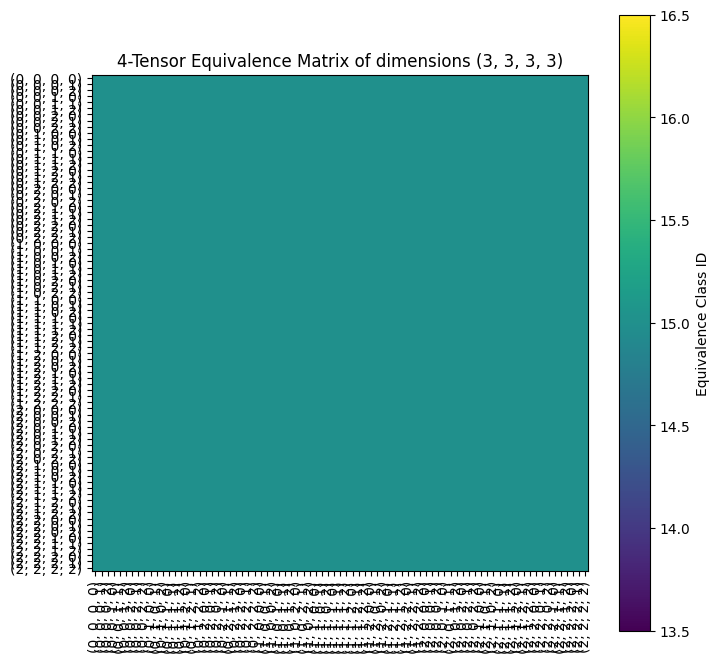

In [12]:
import matplotlib.pyplot as plt
from itertools import combinations, chain, product
from sympy.utilities.iterables import multiset_partitions
import numpy as np

def generate_equivalence_classes(dimensions):
    """
    Generates the equivalence classes for a k-tensor with given dimensions.
    
    Parameters:
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    
    Returns:
    - List of equivalence classes, where each equivalence class is a set of tensor entries.
    """
    k = len(dimensions)  # Number of dimensions
    indices = list(range(k))
    
    # Generate all partitions of the indices using sympy's multiset_partitions
    partitions = list(multiset_partitions(indices))
    
    # Generate equivalence classes
    equivalence_classes = []
    
    for partition in partitions:
        equivalence_class = set()
        # Iterate through all combinations of tensor indices
        for entry in product(*[range(dim) for dim in dimensions]):
            # Check if the entry satisfies the partition
            is_valid = True
            for part in partition:
                if len(set(entry[i] for i in part)) > 1:
                    is_valid = False
                    break
            if is_valid:
                equivalence_class.add(entry)
        equivalence_classes.append(equivalence_class)
    
    # remove every element that is in one of the previous equivalence classes
    for i in range(k, 0, -1):
        for j in range(0, i):
            equivalence_classes[i] = equivalence_classes[i] - equivalence_classes[j]

    return equivalence_classes


# Flatten Equivalence Classes to Matrix
def equivalence_classes_to_matrix(equivalence_classes, dimensions):
    """
    Converts equivalence classes to a matrix representation for visualization.
    
    Parameters:
    - equivalence_classes: List of sets of equivalent tensor entries.
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    
    Returns:
    - Matrix representation of the equivalence classes.
    """
    total_size = np.prod(dimensions)
    flat_matrix = np.zeros((total_size, total_size), dtype=int)
    
    # Generate a mapping of tensor index to flattened index
    indices = list(product(*[range(dim) for dim in dimensions]))
    index_map = {index: i for i, index in enumerate(indices)}
    
    # Assign unique identifiers to each equivalence class
    for class_id, eq_class in enumerate(equivalence_classes, start=1):
        for index in eq_class:
            flat_index = index_map[index]
            flat_matrix[flat_index, flat_index] = class_id  # Diagonal for each equivalence
            for other_index in eq_class:
                other_flat_index = index_map[other_index]
                flat_matrix[flat_index, other_flat_index] = class_id
    
    return flat_matrix


# Plot Equivalence Matrix
def plot_equiv_matrix(equiv_mat, dimensions):
    """
    Plots the equivalence matrix of a flattened tensor.
    
    Parameters:
    - equiv_mat: Matrix representation of equivalence classes.
    - dimensions: Tuple of integers (n_1, n_2, ..., n_k) representing the tensor dimensions.
    """
    total_size = np.prod(dimensions)
    
    # Generate all possible index combinations for the n-dimensional space
    indices = list(product(*[range(dim) for dim in dimensions]))
    
    # Create labels for the ticks with the corresponding coordinates
    tick_labels = [str(index) for index in indices]
    
    plt.figure(figsize=(8, 8))
    plt.imshow(equiv_mat, cmap='viridis', interpolation='nearest')
    
    # Set tick positions and labels
    plt.xticks(ticks=np.arange(total_size), labels=tick_labels, rotation=90)
    plt.yticks(ticks=np.arange(total_size), labels=tick_labels)
    
    tensor_dim = len(dimensions)
    plt.title(f"{tensor_dim}-Tensor Equivalence Matrix of dimensions {dimensions}")
    plt.colorbar(label="Equivalence Class ID")
    plt.show()


# Example Usage
dimensions = (3, 3, 3, 3)  # A 3x3x3 tensor
equivalence_classes = generate_equivalence_classes(dimensions)
equiv_matrix = equivalence_classes_to_matrix(equivalence_classes, dimensions)
plot_equiv_matrix(equiv_matrix, dimensions)

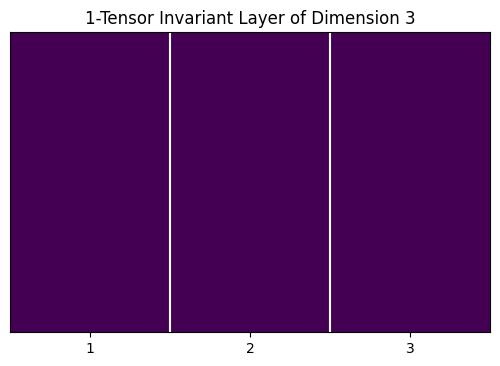

In [36]:
# Create a matrix of size (1, 3)
matrix = np.array([[1, 1, 1]])

# Create a figure with increased height for extra white space
fig = plt.figure(figsize=(6, 10))  # Increase height only
ax = fig.add_axes([0.1, 0.6, 0.8, 0.3])  # Position the plot at the upper part of the figure

# Display the matrix as an image
ax.imshow(matrix, cmap='viridis', aspect='auto')

# Add title and labels
ax.set_title('1-Tensor Invariant Layer of Dimension 3')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['1', '2', '3'], ha='center')
ax.set_yticks([])  # No ticks for the single row
ax.grid(visible=False)  # Disable automatic grid

# Add two vertical lines
for x in [0.5, 1.5]:
    ax.axvline(x=x, color='white', linestyle='-', linewidth=1.5)

# Display the plot
plt.show()

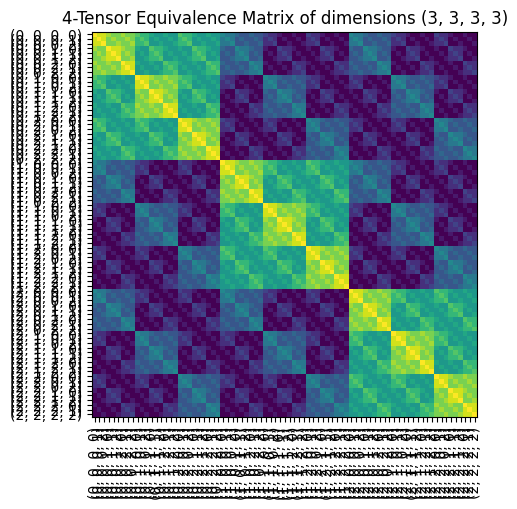

In [3]:
dimensions5 = (3, 3, 3, 3)  # Example 3D grid
equiv_matrix5 = draw_scheme_nd(dimensions5)
plot_equiv_matrix(equiv_matrix5, dimensions5)